ionize Examples
===============

In [1]:
import seaborn as sns
import ionize
import numpy
import math
import cProfile

Response to Acid and base Insults
---------------------------------
Make a buffer. Titrate the buffer with a new ion at a new concentration. Measure the pH of the resulting buffer.

In [2]:
n = 30
pKa_list = numpy.linspace(3, 13, n)
c_insult_list = numpy.linspace(-.2, .2, n)
tris = ionize.load_ion('tris')
chloride = ionize.load_ion('hydrochloric acid')

buffer = ionize.Solution([tris, chloride], [0.1, 0.05])

In [3]:
pH = numpy.zeros([n, n])

for i, pKa in enumerate(pKa_list):
    for j, c_insult in enumerate(c_insult_list):
        insult = ionize.Ion('insult', [int(math.copysign(1, c_insult))], [pKa], [math.copysign(20e-9, c_insult)])
        new_buffer = buffer + ionize.Solution([insult], [abs(c_insult)])
        pH[j,i] = new_buffer.pH

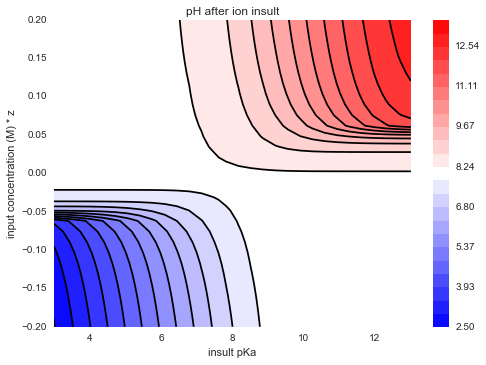

In [4]:
levels = linspace(2.5, 13.5, 24)
f = contourf(pKa_list, c_insult_list, pH, cmap=plt.get_cmap('bwr'), levels=levels)
contour(pKa_list, c_insult_list, pH, colors='k', levels=levels)
colorbar(f)
xlabel('insult pKa')
ylabel('input concentration (M) * z')
title('pH after ion insult')
show()

Blood Composition
-----------------
Calculate the properties of human blood.

In [5]:
carbonic = ionize.load_ion('carbonic acid')
calcium = ionize.load_ion('calcium')
magnesium = ionize.load_ion('magnesium')
phosphorus = ionize.load_ion('phosphoric acid')
potassium = ionize.load_ion('potassium')
sodium = ionize.load_ion('sodium')

In [6]:
ions = [carbonic, calcium, chloride, magnesium, phosphorus, potassium, sodium]
concentrations = [0.030, 0.0045/2, 0.106, 0.0015/2, 0.0023, 0.0035, 0.132]
blood = ionize.Solution(ions, concentrations, T=37)
print blood
print 'Conductivity:', blood.conductivity(), 'S/m'

Solution object -- pH = 7.43012889325, I = 0.147749519112 M
Conductivity: 1.45119763853 S/m


ionize/Ion/correct_pKa.py:20: UserWarning: No data available to correct pKa for temperature.
  warnings.warn('No data available to correct pKa for temperature.')


Titration Purmutations
--------------------
Iterate over the ionize database. Titrate every ion with every other ion to attempt to make a buffer. Plot the pH of every buffer pair. 

In [7]:
def find_buffer(n):
    database = ionize.get_db()
    print len(database.keys()), 'ions in database.'
    pH = []
    capacity = []
    c1 = 0.1
    c2 = 0.05

    for ion_name_1 in database.keys()[0:n]:
        ion_1 = ionize.load_ion(ion_name_1)
        for ion_name_2 in database.keys()[0:n]:
            ion_2 = ionize.load_ion(ion_name_2)
            sol = ionize.Solution([ion_1, ion_2], [c1, c2])
            pH.append(sol.pH)
            capacity.append(sol.buffering_capacity())
    database.close()
    return capacity, pH

In [15]:
 capacity, pH = find_buffer(580)

508 ions in database.


In [9]:
# n = 10
# cProfile.run('capacity, pH = find_buffer(n)')

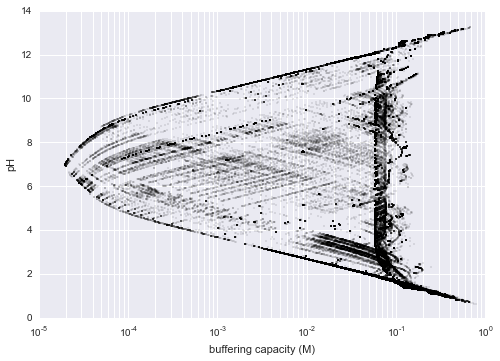

In [27]:
plot(capacity, pH, '.k', alpha=0.2, markersize=3)
xlabel('buffering capacity (M)')
ylabel('pH')
xscale('log')
show()